#Importing the dataset which includes the reviews received for the Netflix App

In [35]:
import pandas as pd
data=pd.read_csv('/content/Netflix.csv')
data

,reviewId,content,score
0,28dd8112-0669-4f0d-a82a-8487b3bfec5a,Bro ur live streams are the worst,1
1,794eccb1-9c10-402a-abb0-b21437035638,Good job with the fight. No more money from me.,1
2,2fd31afa-8db0-4b29-80f9-bdaa61d9f4d7,Absolute garbage,1
3,afe81526-6d16-4377-8cf2-44d47dad08b4,Streaming services are better than Netflix on ...,1
4,5eb6107e-898a-4209-8311-20b7318e9a37,This fight and this app were both floating isl...,1
...,...,...,...
9995,9cb40287-5b70-40c7-b357-024e43f54cb1,Netflix payment payment is so difficult. It is...,1
9996,d10f431d-e677-4c42-bbc9-f62bdaca41a6,No household sharing is not ok. Another reason...,1
9997,f2fccb14-e3f2-4dfd-92fa-4f0d1456752c,[ go woke go broke ] I canceled my subscriptio...,1
9998,5d58aed6-3fb7-4e10-a13c-c87fb29a3d69,Not able to play few titles like the office.,3


#Remove Unwanted Columns

In [36]:
df=data.iloc[:,1:]
df

,content,score
0,Bro ur live streams are the worst,1
1,Good job with the fight. No more money from me.,1
2,Absolute garbage,1
3,Streaming services are better than Netflix on ...,1
4,This fight and this app were both floating isl...,1
...,...,...
9995,Netflix payment payment is so difficult. It is...,1
9996,No household sharing is not ok. Another reason...,1
9997,[ go woke go broke ] I canceled my subscriptio...,1
9998,Not able to play few titles like the office.,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9998 non-null   object
 1   score    10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


#Check for any missing values

In [38]:
df.isnull().sum()

,0
content,2
score,0


#Drop columns which are having missing values

In [39]:
df=df.dropna(subset=['content'])

#Visualize the ratings recieved for each reviews

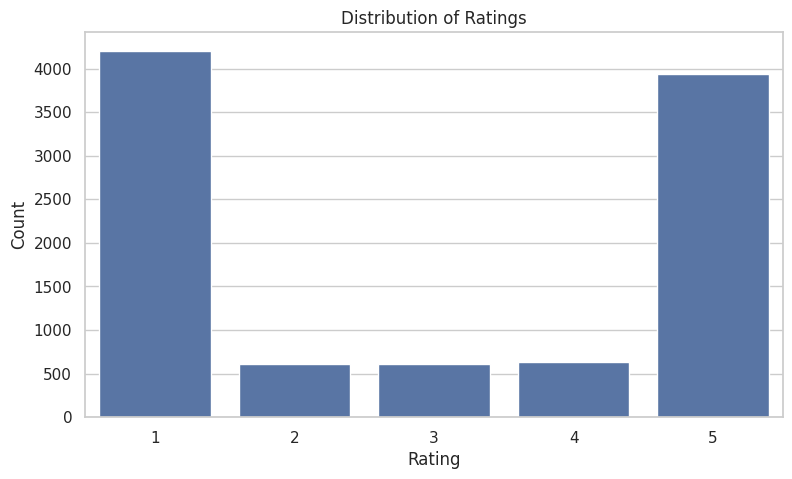

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(9,5))
sns.countplot(data=df,x='score')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#Visualize the length of reach review by counting the no of character

In [41]:
df['Review Length'] = df['content'].apply(len)

<ipython-input-41-97d88c9e9d4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Length'] = df['content'].apply(len)


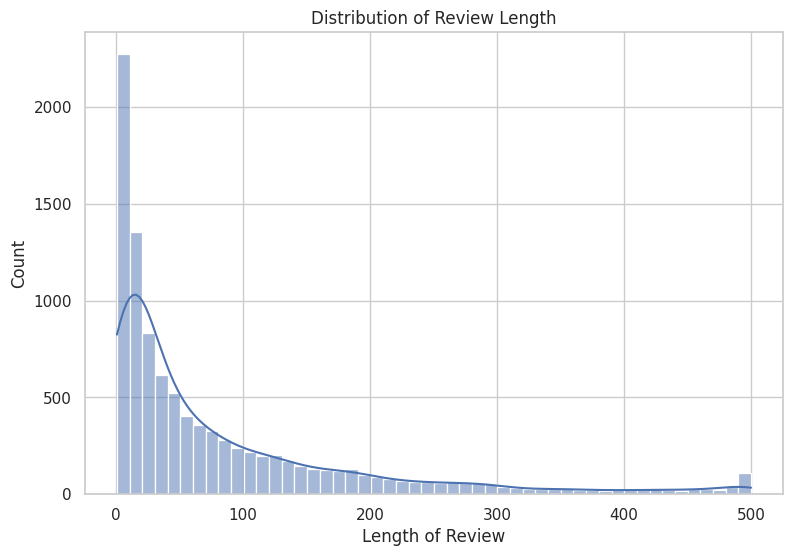

In [43]:
plt.figure(figsize=(9,6))
sns.histplot(df['Review Length'],bins=50,kde=True)
plt.title('Distribution of Review Length')
plt.xlabel("Length of Review")
plt.ylabel("Count")
plt.show()

#Using TextBlob perform sentiment analysis of each review

In [46]:
from textblob import TextBlob
def textblob_sentiment(content):
    sentiment=TextBlob(content).sentiment
    if sentiment.polarity > 0.1:
        return "Positive"
    elif sentiment.polarity <-0.1:
        return "Negative"
    else:
        return "Neutral"
df['sentiment'] = df['content'].apply(textblob_sentiment)

<ipython-input-46-15fc536a0f7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['content'].apply(textblob_sentiment)


In [47]:
df

,content,score,Review Length,sentiment
0,Bro ur live streams are the worst,1,33,Negative
1,Good job with the fight. No more money from me.,1,47,Positive
2,Absolute garbage,1,16,Positive
3,Streaming services are better than Netflix on ...,1,135,Positive
4,This fight and this app were both floating isl...,1,62,Neutral
...,...,...,...,...
9995,Netflix payment payment is so difficult. It is...,1,62,Negative
9996,No household sharing is not ok. Another reason...,1,246,Positive
9997,[ go woke go broke ] I canceled my subscriptio...,1,107,Positive
9998,Not able to play few titles like the office.,3,44,Negative


#Visualize the sentiment distribution

In [49]:
sentiment_distribution = df['sentiment'].value_counts()
sentiment_distribution

,count
sentiment,
Positive,4485
Neutral,3990
Negative,1523


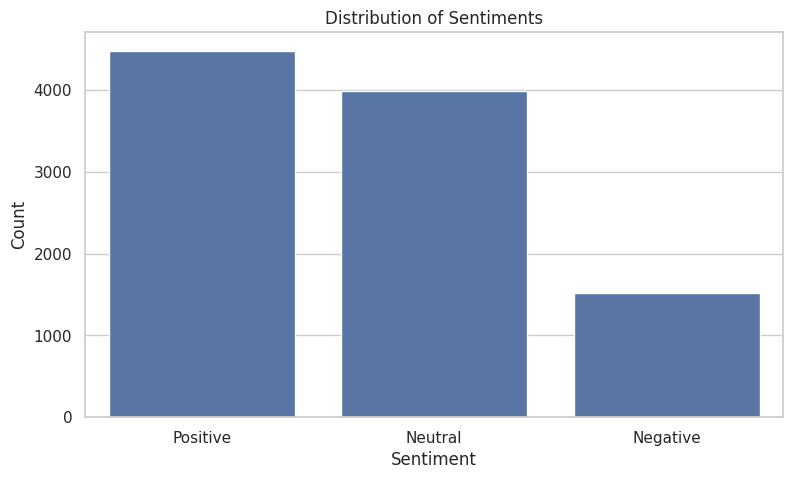

In [50]:
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index,y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#Visualize the sentiment distribution against each ratings

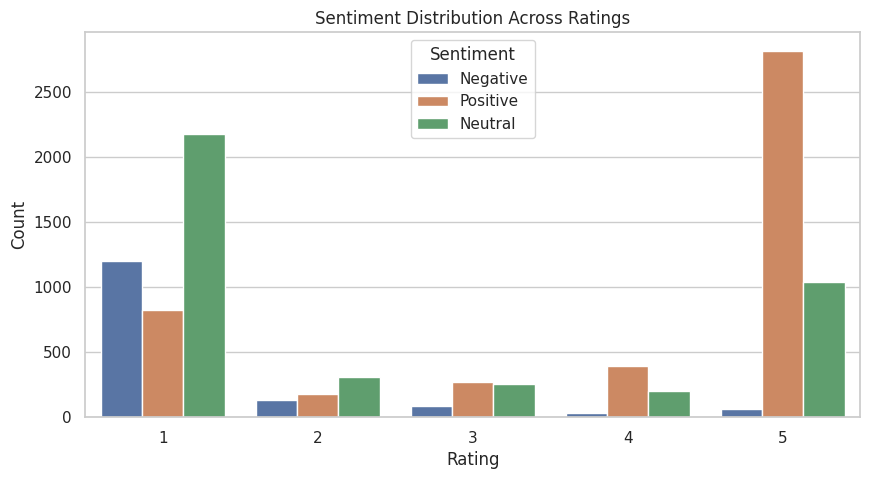

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='score', hue='sentiment')
plt.title("Sentiment Distribution Across Ratings")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

#Create a WordCloud for each of the sentiments showing the unique words in each sentiments

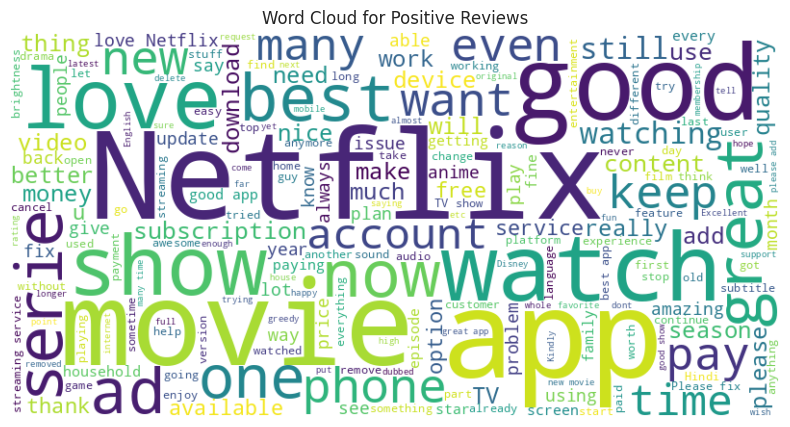

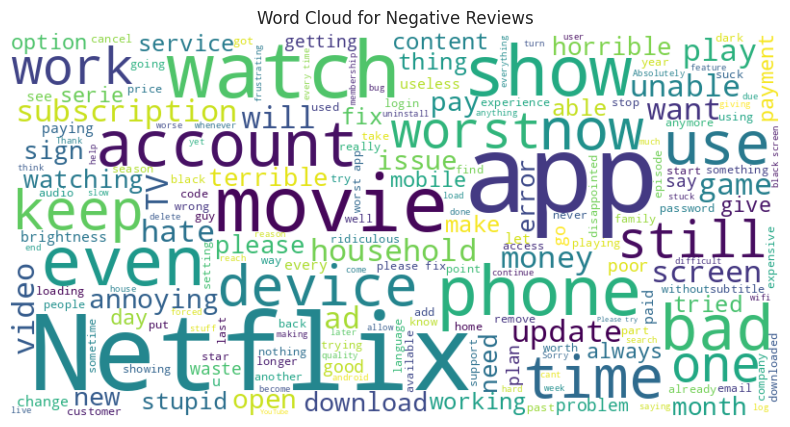

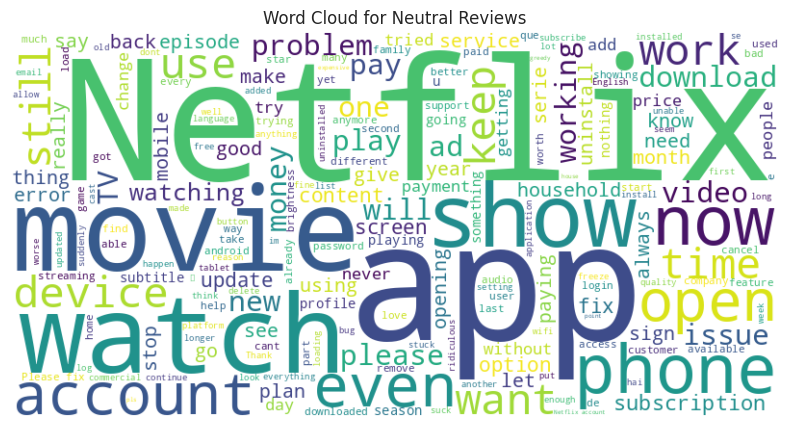

In [53]:
from wordcloud import WordCloud
def generate_word_cloud(sentiment):
    text=''.join(review for review in df[df['sentiment']==sentiment]['content'])
    wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

for sentiment in ['Positive','Negative','Neutral']:
    generate_word_cloud(sentiment)